# Data augmentation

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

C:\Users\Ajitha A\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Dataset Import

In [2]:
df = pd.read_excel('Padel_descriptors.xlsx')
df.head()

,Name,SMILES,ID,nAcid,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,...,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,Target
0,ametryne,CCNC1=NC(NC(C)C)=NC(SC)=N1,AUTOGEN_compounds_1,0,0.2570,0.066049,45.2760,6,6,32,...,1,0,0,0,0,1,1,1,0,Active
1,amiprophos-methyl,COP(=S)(NC(C)C)OC1=C(C=C(C)C=C1)[N+]([O-])=O,AUTOGEN_compounds_2,0,1.7133,2.935397,50.4335,6,6,36,...,1,1,1,1,1,1,1,1,0,Active
2,benazolin-ethyl,CCOC(=O)CN1C(=O)SC2=C1C(Cl)=CC=C2,AUTOGEN_compounds_3,0,1.2783,1.634051,41.6959,6,6,27,...,1,0,0,0,0,1,1,1,0,Active
3,bensulfuron-methyl,COC(=O)C1=CC=CC=C1CS(=O)(=O)NC(=O)NC1=NC(OC)=C...,AUTOGEN_compounds_4,0,-1.1337,1.285276,49.9164,12,12,46,...,1,0,0,0,0,1,1,1,0,Active
4,bentazon,CC(C)N1C(=O)C2=C(NS1(=O)=O)C=CC=C2,AUTOGEN_compounds_5,0,-1.5191,2.307665,33.7784,6,6,28,...,1,0,0,0,0,1,1,1,0,Active


In [3]:
# Drop unwanted columns

df.drop(['Name', 'SMILES', 'ID', ],axis=1, inplace= True)

In [4]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

categorical_features = ['Target']
le = LabelEncoder()
for i in range(1):
    new = le.fit_transform(df[categorical_features[i]])
    df[categorical_features[i]] = new
df.head()

,nAcid,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,Target
0,0,0.2570,0.066049,45.2760,6,6,32,15,17,0,...,1,0,0,0,0,1,1,1,0,0
1,0,1.7133,2.935397,50.4335,6,6,36,19,17,0,...,1,1,1,1,1,1,1,1,0,0
2,0,1.2783,1.634051,41.6959,6,6,27,17,10,0,...,1,0,0,0,0,1,1,1,0,0
3,0,-1.1337,1.285276,49.9164,12,12,46,28,18,0,...,1,0,0,0,0,1,1,1,0,0
4,0,-1.5191,2.307665,33.7784,6,6,28,16,12,0,...,1,0,0,0,0,1,1,1,0,0


In [5]:
# Dataset partition 

x1 = df.iloc[:,:-1]
y1 = df.Target

In [6]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2, random_state=42)

# ML Model development with all set of features

## LR

In [9]:
LR_f = LogisticRegression()
LR_f.fit(x1_train, y1_train)

LogisticRegression()

In [12]:
LR_predict_f = LR_f.predict(x1_test)

In [13]:
print('Accuracy_score=',(accuracy_score(y1_test, LR_predict_f)))
print((confusion_matrix(y1_test, LR_predict_f)))
print(classification_report(y1_test, LR_predict_f))
pd.crosstab(y1_test, LR_predict_f)

Accuracy_score= 0.9306930693069307
[[95  7]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       102
           1       0.93      0.93      0.93       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,95,7
1,7,93


## RF

In [14]:
RF_f = RandomForestClassifier(random_state = 42)
RF_f.fit(x1_train, y1_train)

RandomForestClassifier(random_state=42)

In [15]:
RF_pred_f = RF_f.predict(x1_test)
accuracy_score(y1_test, RF_pred_f)

0.9306930693069307

In [16]:
print(confusion_matrix(y1_test, RF_pred_f))
print(classification_report(y1_test, RF_pred_f))
pd.crosstab(y1_test, RF_pred_f)

[[97  5]
 [ 9 91]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       102
           1       0.95      0.91      0.93       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,97,5
1,9,91


## XGB

In [7]:
import xgboost as xgb
xg_f = xgb.XGBClassifier()
xg_f.fit(x1_train, y1_train)

[17:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
xg_pred_f = xg_f.predict(x1_test)
accuracy_score(y1_test, xg_pred_f)

0.9455445544554455

In [9]:
print(confusion_matrix(y1_test, xg_pred_f))
print(classification_report(y1_test, xg_pred_f))
pd.crosstab(y1_test, xg_pred_f)

[[98  4]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       102
           1       0.96      0.93      0.94       100

    accuracy                           0.95       202
   macro avg       0.95      0.95      0.95       202
weighted avg       0.95      0.95      0.95       202



col_0,0,1
Target,,
0,98,4
1,7,93


## DT

In [20]:
DT_f = DecisionTreeClassifier(random_state=42)
DT_f.fit(x1_train, y1_train)

DecisionTreeClassifier(random_state=42)

In [22]:
DT_predict_f = DT_f.predict(x1_test)
print('Accuracy_score=',(accuracy_score(y1_test, DT_predict_f)))
print((confusion_matrix(y1_test, DT_predict_f)))

Accuracy_score= 0.9158415841584159
[[94  8]
 [ 9 91]]


In [23]:
print(classification_report(y1_test, DT_predict_f))
pd.crosstab(y1_test, DT_predict_f)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       102
           1       0.92      0.91      0.91       100

    accuracy                           0.92       202
   macro avg       0.92      0.92      0.92       202
weighted avg       0.92      0.92      0.92       202



col_0,0,1
Target,,
0,94,8
1,9,91


## NB

In [24]:
NB_f = GaussianNB() 
NB_f.fit(x1_train, y1_train)

GaussianNB()

In [26]:
NB_pred_f = NB_f.predict(x1_test)
print('Accuracy_score=',(accuracy_score(y1_test, NB_pred_f)))
print((confusion_matrix(y1_test, NB_pred_f)))
print(classification_report(y1_test, NB_pred_f))
pd.crosstab(y1_test, NB_pred_f)

Accuracy_score= 0.8960396039603961
[[94  8]
 [13 87]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       102
           1       0.92      0.87      0.89       100

    accuracy                           0.90       202
   macro avg       0.90      0.90      0.90       202
weighted avg       0.90      0.90      0.90       202



col_0,0,1
Target,,
0,94,8
1,13,87


## SVM

In [69]:
SV_f = svm.SVC()
SV_f.fit(x1_train, y1_train)

SVC()

In [30]:
svm_f = SV_f.predict(x1_test)

In [31]:
print("Accuracy:",accuracy_score(y1_test, svm_f))

Accuracy: 0.8465346534653465


In [32]:
print((confusion_matrix(y1_test, svm_f)))
print(classification_report(y1_test, svm_f))
pd.crosstab(y1_test, svm_f)

[[88 14]
 [17 83]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       102
           1       0.86      0.83      0.84       100

    accuracy                           0.85       202
   macro avg       0.85      0.85      0.85       202
weighted avg       0.85      0.85      0.85       202



col_0,0,1
Target,,
0,88,14
1,17,83


## ANN

In [35]:
NN_f = MLPClassifier(random_state=42)
NN_f.fit(x1_train, y1_train)

MLPClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score
ANN_f = NN_f.predict(x1_test)
print(accuracy_score(y1_test, ANN_f))
print(classification_report(y1_test, ANN_f))
pd.crosstab(y1_test, ANN_f)

0.9306930693069307
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       102
           1       0.94      0.92      0.93       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,96,6
1,8,92


# Feature Engineering - (i) Correlation filter

In [7]:
correlated_features = set()
correlation_matrix = df.corr()

In [8]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [9]:
print(len(correlated_features))

262


In [10]:
print(correlated_features)

{'PubchemFP399', 'PubchemFP545', 'PubchemFP430', 'PubchemFP585', 'PubchemFP678', 'PubchemFP642', 'MACCSFP61', 'PubchemFP403', 'PubchemFP414', 'PubchemFP393', 'PubchemFP287', 'MACCSFP46', 'PubchemFP583', 'PubchemFP299', 'PubchemFP417', 'nT9HeteroRing', 'PubchemFP761', 'PubchemFP501', 'MACCSFP58', 'PubchemFP603', 'PubchemFP450', 'nT11HeteroRing', 'PubchemFP466', 'ExtFP1014', 'PubchemFP457', 'MACCSFP88', 'PubchemFP655', 'SubFP275', 'PubchemFP504', 'MACCSFP103', 'nT10Ring', 'PubchemFP550', 'PubchemFP15', 'PubchemFP406', 'PubchemFP680', 'PubchemFP606', 'SubFP3', 'PubchemFP815', 'SubFP188', 'EStateFP15', 'EStateFP70', 'PubchemFP314', 'PubchemFP456', 'PubchemFP564', 'SubFP183', 'PubchemFP821', 'PubchemFP792', 'MACCSFP40', 'PubchemFP654', 'PubchemFP445', 'PubchemFP181', 'PubchemFP305', 'PubchemFP785', 'PubchemFP523', 'SubFP137', 'PubchemFP666', 'SubFP133', 'PubchemFP472', 'PubchemFP375', 'nT10HeteroRing', 'PubchemFP419', 'PubchemFP634', 'PubchemFP791', 'PubchemFP813', 'PubchemFP30', 'PubchemFP

In [11]:
df.drop(labels=correlated_features, axis=1, inplace=True)

In [12]:
x2 = df.iloc[:,:-1]
y2 = df.Target

In [13]:
x2.columns

Index(['nAcid', 'ALogP', 'ALogp2', 'AMR', 'naAromAtom', 'nAtom', 'nHeavyAtom',
       'nH', 'nB', 'nC',
       ...
       'SubFP200', 'SubFP214', 'SubFP287', 'SubFP294', 'SubFP295', 'SubFP297',
       'SubFP298', 'SubFP300', 'SubFP302', 'SubFP303'],
      dtype='object', length=2621)

In [14]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2, random_state=42)

# Model development with correlation filter features

## LR

In [50]:
LR_c = LogisticRegression()
LR_c.fit(x2_train, y2_train)

LogisticRegression()

In [51]:
LR_predict_c = LR_c.predict(x2_test)

In [52]:
print('Accuracy_score=',(accuracy_score(y2_test, LR_predict_c)))
print((confusion_matrix(y2_test, LR_predict_c)))
print(classification_report(y2_test, LR_predict_c))
pd.crosstab(y2_test, LR_predict_c)

Accuracy_score= 0.9405940594059405
[[96  6]
 [ 6 94]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       102
           1       0.94      0.94      0.94       100

    accuracy                           0.94       202
   macro avg       0.94      0.94      0.94       202
weighted avg       0.94      0.94      0.94       202



col_0,0,1
Target,,
0,96,6
1,6,94


## RF

In [53]:
RF_c = RandomForestClassifier(random_state = 42)
RF_c.fit(x2_train, y2_train)

RandomForestClassifier(random_state=42)

In [55]:
RF_pred_c = RF_c.predict(x2_test)
print(accuracy_score(y2_test, RF_pred_c))
print(confusion_matrix(y2_test, RF_pred_c))
print(classification_report(y2_test, RF_pred_c))
pd.crosstab(y2_test, RF_pred_c)

0.9306930693069307
[[97  5]
 [ 9 91]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       102
           1       0.95      0.91      0.93       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,97,5
1,9,91


## XGB

In [56]:
import xgboost as xgb
xg_c = xgb.XGBClassifier()
xg_c.fit(x2_train, y2_train)

[12:59:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
xg_pred_c = xg_c.predict(x2_test)
print(accuracy_score(y2_test, xg_pred_c))
print(confusion_matrix(y2_test, xg_pred_c))
print(classification_report(y2_test, xg_pred_c))
pd.crosstab(y2_test, xg_pred_c)

0.9405940594059405
[[98  4]
 [ 8 92]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.96      0.92      0.94       100

    accuracy                           0.94       202
   macro avg       0.94      0.94      0.94       202
weighted avg       0.94      0.94      0.94       202



col_0,0,1
Target,,
0,98,4
1,8,92


## DT

In [59]:
DT_c = DecisionTreeClassifier(random_state=42)
DT_c.fit(x2_train, y2_train)

DecisionTreeClassifier(random_state=42)

In [60]:
DT_predict_c = DT_c.predict(x2_test)
print('Accuracy_score=',(accuracy_score(y2_test, DT_predict_c)))
print((confusion_matrix(y2_test, DT_predict_c)))
print(classification_report(y2_test, DT_predict_c))
pd.crosstab(y2_test, DT_predict_c)

Accuracy_score= 0.8910891089108911
[[91 11]
 [11 89]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       102
           1       0.89      0.89      0.89       100

    accuracy                           0.89       202
   macro avg       0.89      0.89      0.89       202
weighted avg       0.89      0.89      0.89       202



col_0,0,1
Target,,
0,91,11
1,11,89


## NB

In [64]:
NB_c = GaussianNB() 
NB_c.fit(x2_train, y2_train)

GaussianNB()

In [66]:
NB_pred_c = NB_c.predict(x2_test)
print('Accuracy_score=',(accuracy_score(y2_test, NB_pred_c)))
print((confusion_matrix(y2_test, NB_pred_c)))
print(classification_report(y2_test, NB_pred_c))
pd.crosstab(y2_test, NB_pred_c)

Accuracy_score= 0.8960396039603961
[[93  9]
 [12 88]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       102
           1       0.91      0.88      0.89       100

    accuracy                           0.90       202
   macro avg       0.90      0.90      0.90       202
weighted avg       0.90      0.90      0.90       202



col_0,0,1
Target,,
0,93,9
1,12,88


## SVM

In [70]:
SV_c = svm.SVC()
SV_c.fit(x2_train, y2_train)

SVC()

In [71]:
svm_c = SV_c.predict(x2_test)
print("Accuracy:",accuracy_score(y2_test, svm_c))
print((confusion_matrix(y2_test, svm_c)))
print(classification_report(y2_test, svm_c))
pd.crosstab(y2_test, svm_c)

Accuracy: 0.8415841584158416
[[88 14]
 [18 82]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       102
           1       0.85      0.82      0.84       100

    accuracy                           0.84       202
   macro avg       0.84      0.84      0.84       202
weighted avg       0.84      0.84      0.84       202



col_0,0,1
Target,,
0,88,14
1,18,82


## ANN

In [61]:
NN_c = MLPClassifier(random_state=42)
NN_c.fit(x2_train, y2_train)

MLPClassifier(random_state=42)

In [63]:
ANN_c = NN_c.predict(x2_test)
print(accuracy_score(y2_test, ANN_c))
print(classification_report(y2_test, ANN_c))
pd.crosstab(y2_test, ANN_c)

0.9405940594059405
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.96      0.92      0.94       100

    accuracy                           0.94       202
   macro avg       0.94      0.94      0.94       202
weighted avg       0.94      0.94      0.94       202



col_0,0,1
Target,,
0,98,4
1,8,92


# Feature Engineering - (ii) RFECV

In [15]:
rfecv = RFECV(
    estimator=XGBClassifier(),
    step=1,
    cv=StratifiedKFold(5)
)

In [ ]:
rfecv.fit(x2.values, y2)

[13:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:19:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:21:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:21:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:22:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:22:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:23:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:25:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:25:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:27:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:30:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:38:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:39:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:42:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:58:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:00:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:41:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_,  linewidth=3)

plt.show()

In [ ]:
import numpy as np
print(np.where(rfecv.support_ == False)[0])
df_rfecv = x2.drop(x.columns[np.where(rfecv.support_ == False)[0]], axis=1)
df_rfecv

In [ ]:
x3 = df_rfecv
y3 = df_rfecv.Target

In [13]:
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.2, random_state=42)

# Model development with RFECV features

## LR

In [16]:
LR = LogisticRegression()
LR.fit(x3_train, y3_train)

LogisticRegression()

In [17]:
LR_predict = LR.predict(x3_test)

In [18]:
print('Accuracy_score=',(accuracy_score(y3_test, LR_predict)))
print((confusion_matrix(y3_test, LR_predict)))
print(classification_report(y3_test, LR_predict))
pd.crosstab(y3_test, LR_predict)

Accuracy_score= 0.9554455445544554
[[101   1]
 [  8  92]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       102
           1       0.99      0.92      0.95       100

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202



col_0,0,1
Target,,
0,101,1
1,8,92


## RF

In [77]:
RF = RandomForestClassifier(random_state = 42)
RF.fit(x3_train, y3_train)

RandomForestClassifier(random_state=42)

In [78]:
RF_pred = RF.predict(x3_test)
accuracy_score(y3_test, RF_pred)

0.9405940594059405

In [79]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y3_test, RF_pred))
print(classification_report(y3_test, RF_pred))
pd.crosstab(y3_test, RF_pred)

[[99  3]
 [ 9 91]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       102
           1       0.97      0.91      0.94       100

    accuracy                           0.94       202
   macro avg       0.94      0.94      0.94       202
weighted avg       0.94      0.94      0.94       202



col_0,0,1
Target,,
0,99,3
1,9,91


## XGB

In [19]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(x3_train, y3_train)

[17:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
xg_pred = xg.predict(x3_test)
print(accuracy_score(y3_test, xg_pred))
print(confusion_matrix(y3_test, xg_pred))
print(classification_report(y3_test, xg_pred))
pd.crosstab(y3_test, xg_pred)

0.9504950495049505
[[99  3]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       102
           1       0.97      0.93      0.95       100

    accuracy                           0.95       202
   macro avg       0.95      0.95      0.95       202
weighted avg       0.95      0.95      0.95       202



col_0,0,1
Target,,
0,99,3
1,7,93


## DT

In [84]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(x3_train, y3_train)

DecisionTreeClassifier(random_state=42)

In [85]:
DT_predict = DT.predict(x3_test)
print('Accuracy_score=',(accuracy_score(y3_test, DT_predict)))
print((confusion_matrix(y3_test, DT_predict)))

Accuracy_score= 0.9108910891089109
[[96  6]
 [12 88]]


In [86]:
print(classification_report(y3_test, DT_predict))
pd.crosstab(y3_test, DT_predict)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       102
           1       0.94      0.88      0.91       100

    accuracy                           0.91       202
   macro avg       0.91      0.91      0.91       202
weighted avg       0.91      0.91      0.91       202



col_0,0,1
Target,,
0,96,6
1,12,88


## NB

In [87]:
NB = GaussianNB() 
NB.fit(x3_train, y3_train)

GaussianNB()

In [88]:
NB_pred = NB.predict(x3_test)
print('Accuracy_score=',(accuracy_score(y3_test, NB_pred)))
print((confusion_matrix(y3_test, NB_pred)))
print(classification_report(y3_test, NB_pred))
pd.crosstab(y3_test, NB_pred)

Accuracy_score= 0.9257425742574258
[[97  5]
 [10 90]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       102
           1       0.95      0.90      0.92       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,97,5
1,10,90


## SVC

In [89]:
SV = svm.SVC()
SV.fit(x3_train, y_train)

SVC()

In [90]:
SVC_pred = SV.predict(x3_test)
print('Accuracy_score=',(accuracy_score(y3_test, SVC_pred)))
print((confusion_matrix(y3_test, SVC_pred)))
print(classification_report(y3_test, SVC_pred))
pd.crosstab(y3_test, SVC_pred)

Accuracy_score= 0.801980198019802
[[84 18]
 [22 78]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       102
           1       0.81      0.78      0.80       100

    accuracy                           0.80       202
   macro avg       0.80      0.80      0.80       202
weighted avg       0.80      0.80      0.80       202



col_0,0,1
Target,,
0,84,18
1,22,78


## ANN

In [91]:
NN = MLPClassifier(random_state=42)
NN.fit(x3_train, y_train)

MLPClassifier(random_state=42)

In [92]:
ANN = NN.predict(x3_test)
print(accuracy_score(y3_test, ANN))
print(classification_report(y3_test, ANN))
pd.crosstab(y3_test, ANN)

0.9554455445544554
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.97      0.94      0.95       100

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202



col_0,0,1
Target,,
0,99,3
1,6,94


# External Dataset Import

In [ ]:
df_ext = pd.read_excel('External_set.xlsx')
df_ext.head()

In [ ]:
df_ext.drop(['Name', 'SMILES', 'ID', ],axis=1, inplace= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Target']
le = LabelEncoder()
for i in range(1):
    new = le.fit_transform(df_ext[categorical_features[i]])
    df_ext[categorical_features[i]] = new
df_ext.head()

In [ ]:
x_ext = df_ext.loc[:,['nAcid','ALogP','ALogp2','AMR','naAromAtom','nAtom','nHeavyAtom','nH','nC','nN','nO','nF','nCl','nX','nBondsD',
              'C1SP2','C1SP3','C3SP3','fragC','nHBDon','nHBDon_Lipinski','nTRing','RotBtFrac','MW','AMW','FP7','FP17','FP18',
              'FP122','FP131','FP189','FP190','FP250','FP277','FP305','FP310','FP326','FP344','FP345','FP450','FP462','FP486',
              'FP513','FP521','FP579','FP661','FP663','FP683','FP701','FP718','FP757','FP774','FP775','FP787','FP797','FP807',
              'FP823','FP928','FP939','FP963','ExtFP94','ExtFP115','ExtFP178','ExtFP236','ExtFP266','ExtFP269','ExtFP290',
              'ExtFP353','ExtFP381','ExtFP424','ExtFP426','ExtFP517','ExtFP533','ExtFP554','ExtFP564','ExtFP599','ExtFP627',
              'ExtFP726','ExtFP763','ExtFP785','ExtFP812','ExtFP864','ExtFP872','ExtFP949','ExtFP955','ExtFP960','ExtFP990',
              'EStateFP28','EStateFP34','MACCSFP16','MACCSFP32','MACCSFP39','MACCSFP49','MACCSFP102','MACCSFP110','MACCSFP112',
              'MACCSFP123','MACCSFP125','MACCSFP126','MACCSFP130','MACCSFP138','MACCSFP151','PubchemFP145','PubchemFP148',
              'PubchemFP336','PubchemFP356','PubchemFP357','PubchemFP378','PubchemFP379','PubchemFP532','PubchemFP548',
              'PubchemFP569','PubchemFP605','PubchemFP617','PubchemFP643','PubchemFP650','PubchemFP686','PubchemFP737',
              'SubFP19','SubFP28','SubFP84','SubFP297']]
y_ext = df_ext.Target

# Hyper parameter tuning and External validation

# LR

In [243]:
LR = LogisticRegression(penalty= 'l2', solver= 'lbfgs', C= 8, random_state = 2, max_iter= 50)
LR.fit(x3_train, y3_train)

LogisticRegression(C=8, max_iter=50, random_state=2)

In [183]:
LR_predict = LR.predict(x3_test)

In [184]:
print('Accuracy_score=',(accuracy_score(y3_test, LR_predict)))
print((confusion_matrix(y3_test, LR_predict)))
print(classification_report(y3_test, LR_predict))
pd.crosstab(y3_test, LR_predict)

Accuracy_score= 0.9306930693069307
[[98  4]
 [10 90]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       102
           1       0.96      0.90      0.93       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,98,4
1,10,90


## k fold

In [186]:
from sklearn.model_selection import cross_val_score,KFold

LR=LogisticRegression(penalty= 'l2', solver= 'lbfgs', random_state = 2,
                      C= 8, max_iter= 50)
kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(LR,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95652174 0.95652174 0.93167702 0.9068323  0.95      ]
Average Cross Validation score :0.9403105590062111


In [187]:
from sklearn.model_selection import cross_val_score,KFold

LR=LogisticRegression(penalty= 'l2', solver= 'lbfgs', random_state = 2,
                      C= 8, max_iter= 50)
kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(LR,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95061728 0.97530864 0.96296296 0.97530864 0.975      0.9
 0.95       0.9375     0.9375     0.95      ]
Average Cross Validation score :0.9514197530864198


## AUC & ROC

LR ROC AUC 0.980


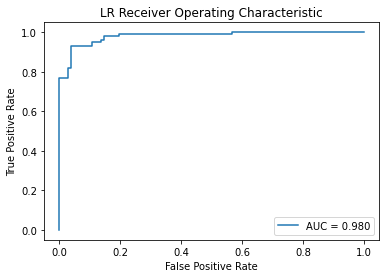

In [195]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
LR1 = LR.predict_proba(x3_test)[:, 1]
roc_auc = roc_auc_score(y3_test, LR1)
fpr1, tpr1, threshold = roc_curve(y3_test, LR1)
plt.title('LR Receiver Operating Characteristic')
plt.plot(fpr1, tpr1,label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('LR ROC AUC %.3f' % roc_auc)
plt.savefig('LR ROC_curve.jpg')
plt.show()

# Ext val

In [246]:
LR_predict_ext = LR.predict(x3_ext)

In [247]:
print('Accuracy_score=',(accuracy_score(y3_ext, LR_predict_ext )))
print((confusion_matrix(y3_ext, LR_predict_ext )))
print(classification_report(y3_ext, LR_predict_ext ))
pd.crosstab(y3_ext, LR_predict_ext )

Accuracy_score= 0.935
[[96  4]
 [ 9 91]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       100
           1       0.96      0.91      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



col_0,0,1
Target,,
0,96,4
1,9,91


# Random forest

In [248]:
RF = RandomForestClassifier(n_estimators= 974, max_depth= 44, n_jobs= 47, random_state= 130, min_samples_split= 5, 
                            min_samples_leaf= 1, max_leaf_nodes= 292, bootstrap= True, verbose= 0)
RF.fit(x3_train, y3_train)

RandomForestClassifier(max_depth=44, max_leaf_nodes=292, min_samples_split=5,
                       n_estimators=974, n_jobs=47, random_state=130)

In [12]:
RF_pred = RF.predict(x3_test)
accuracy_score(y3_test, RF_pred)

0.9455445544554455

In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y3_test, RF_pred))
print(classification_report(y3_test, RF_pred))
pd.crosstab(y3_test, RF_pred)

[[99  3]
 [ 8 92]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       102
           1       0.97      0.92      0.94       100

    accuracy                           0.95       202
   macro avg       0.95      0.95      0.95       202
weighted avg       0.95      0.95      0.95       202



col_0,0,1
Target,,
0,99,3
1,8,92


In [196]:
from sklearn.model_selection import cross_val_score,KFold

RF=RandomForestClassifier(n_estimators= 974, max_depth= 44, n_jobs= 47, random_state= 130, min_samples_split= 5, 
                            min_samples_leaf= 1, max_leaf_nodes= 292, bootstrap= True, verbose= 0)
kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(RF,x3_train,y3_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.97515528 0.98757764 0.95652174 0.95031056 0.975     ]
Average Cross Validation score :0.9689130434782609


In [197]:
from sklearn.model_selection import cross_val_score,KFold

RF=RandomForestClassifier(n_estimators= 974, max_depth= 44, n_jobs= 47, random_state= 130, min_samples_split= 5, 
                            min_samples_leaf= 1, max_leaf_nodes= 292, bootstrap= True, verbose= 0)
kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(RF,x3_train,y3_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96296296 0.97530864 1.         0.96296296 0.975      0.925
 0.9625     0.95       0.9875     0.9625    ]
Average Cross Validation score :0.9663734567901235


RF ROC AUC 0.992


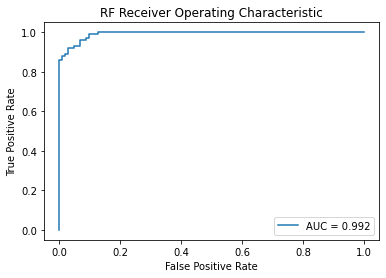

In [200]:
from sklearn.metrics import roc_curve, roc_auc_score

RF1 = RF.predict_proba(x3_test)[:, 1]
roc_auc = roc_auc_score(y3_test, RF1)
fpr1, tpr1, threshold = roc_curve(y3_test, RF1)
plt.title('RF Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('RF ROC AUC %.3f' % roc_auc)
plt.savefig('RF ROC_curve.jpg')
plt.show()

# Ext val

In [249]:
RF_pred_ext = RF.predict(x3_ext)
accuracy_score(y3_ext, RF_pred_ext)

0.96

In [250]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y3_ext, RF_pred_ext))
print(classification_report(y3_ext, RF_pred_ext))
pd.crosstab(y3_ext, RF_pred_ext)

[[96  4]
 [ 4 96]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       100
           1       0.96      0.96      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



col_0,0,1
Target,,
0,96,4
1,4,96


# XGB

In [14]:
import xgboost as xgb
xg = xgb.XGBClassifier(gamma= 1, colsample_bylevel= 0.5, colsample_bytree= 0, colsample_bynode= 0.3, subsample= 0.8,
                       n_estimators= 593, learning_rate= 0.3, max_delta_step= 47, max_depth= 34, random_state= 151, 
                       num_parallel_tree= 45, min_child_weight= 1,verbosity= 0)
xg.fit(x3_train, y3_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.3, colsample_bytree=0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=47, max_depth=34,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=593, n_jobs=8, num_parallel_tree=45,
              random_state=151, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [15]:
xgb = xg.predict(x3_test)
print('Accuracy_score=',(accuracy_score(y3_test, xgb)))
print((confusion_matrix(y3_test, xgb)))

Accuracy_score= 0.9603960396039604
[[101   1]
 [  7  93]]


In [16]:
print(classification_report(y3_test,xgb))
pd.crosstab(y3_test, xgb)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       102
           1       0.99      0.93      0.96       100

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202



col_0,0,1
Target,,
0,101,1
1,7,93


In [17]:
from sklearn.model_selection import cross_val_score,KFold

Xg= XGBClassifier(gamma= 1, colsample_bylevel= 0.5, colsample_bytree= 0, colsample_bynode= 0.3, subsample= 0.8,
                       n_estimators= 593, learning_rate= 0.3, max_delta_step= 47, max_depth= 34, random_state= 151, 
                       num_parallel_tree= 45, min_child_weight= 1,verbosity= 0)


kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(Xg,x3_train,y3_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.98136646 0.98757764 0.95031056 0.95031056 0.96875   ]
Average Cross Validation score :0.9676630434782609


In [18]:
from sklearn.model_selection import cross_val_score,KFold

Xg= XGBClassifier(gamma= 1, colsample_bylevel= 0.5, colsample_bytree= 0, colsample_bynode= 0.3, subsample= 0.8,
                       n_estimators= 593, learning_rate= 0.3, max_delta_step= 47, max_depth= 34, random_state= 151, 
                       num_parallel_tree= 45, min_child_weight= 1,verbosity= 0)


kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(Xg,x3_train,y3_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.97530864 0.98765432 0.98765432 0.98765432 0.975      0.925
 0.9875     0.9375     1.         0.95      ]
Average Cross Validation score :0.9713271604938271


Xg ROC AUC 0.994


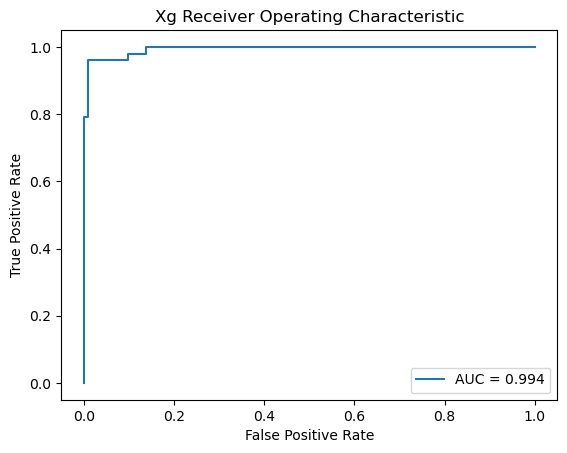

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

Xg1 = xg.predict_proba(x3_test)[:, 1]
roc_auc = roc_auc_score(y3_test, Xg1)
fpr1, tpr1, threshold = roc_curve(y3_test, Xg1)
plt.title('Xg Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('Xg ROC AUC %.3f' % roc_auc)
plt.savefig('Xg ROC_curve.jpg')
plt.show()

# Ext val

In [20]:
xgb_ext = xg.predict(x3_ext)
print('Accuracy_score=',(accuracy_score(y3_ext, xgb_ext)))
print((confusion_matrix(y3_ext, xgb_ext)))

Accuracy_score= 0.945
[[99  1]
 [10 90]]


In [21]:
print(classification_report(y3_ext,xgb_ext))
pd.crosstab(y3_ext, xgb_ext)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       100
           1       0.99      0.90      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



col_0,0,1
Target,,
0,99,1
1,10,90


In [22]:
from sklearn.model_selection import cross_val_score,KFold

Xg= XGBClassifier(gamma= 1, colsample_bylevel= 0.5, colsample_bytree= 0, colsample_bynode= 0.3, subsample= 0.8,
                       n_estimators= 593, learning_rate= 0.3, max_delta_step= 47, max_depth= 34, random_state= 151, 
                       num_parallel_tree= 45, min_child_weight= 1,verbosity= 0)


kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(Xg,x_ext,y_ext,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.925 0.975 0.975 0.975 0.975]
Average Cross Validation score :0.9650000000000001


In [23]:
from sklearn.model_selection import cross_val_score,KFold

Xg= XGBClassifier(gamma= 1, colsample_bylevel= 0.5, colsample_bytree= 0, colsample_bynode= 0.3, subsample= 0.8,
                       n_estimators= 593, learning_rate= 0.3, max_delta_step= 47, max_depth= 34, random_state= 151, 
                       num_parallel_tree= 45, min_child_weight= 1,verbosity= 0)


kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(Xg,x_ext,y_ext,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95 0.95 0.95 1.   0.95 1.   1.   0.95 1.   1.  ]
Average Cross Validation score :0.975


Xg external ROC AUC 0.985


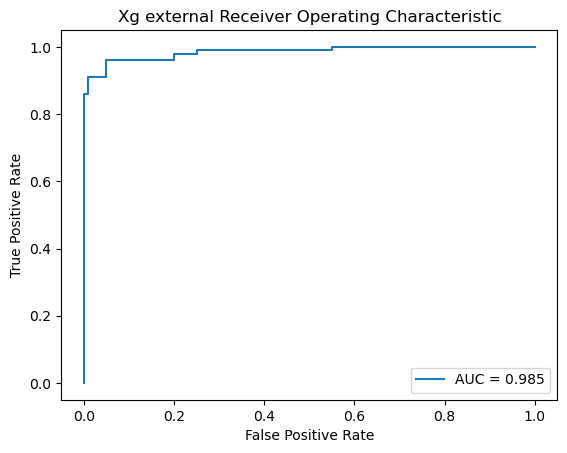

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

Xg1 = xg.predict_proba(x_ext)[:, 1]
roc_auc = roc_auc_score(y_ext, Xg1)
fpr1, tpr1, threshold = roc_curve(y_ext, Xg1)
plt.title('Xg external Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('Xg external ROC AUC %.3f' % roc_auc)
plt.savefig('Xg external ROC_curve.jpg')
plt.show()

# DT

In [271]:
DT = DecisionTreeClassifier(min_weight_fraction_leaf= 0, max_depth= 25, random_state= 69, min_samples_split= 5, 
                            min_samples_leaf= 5, max_leaf_nodes= 41, criterion= 'gini', splitter='best')
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=41, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0,
                       random_state=69)

In [18]:
DT_predict = DT.predict(x_test)
print('Accuracy_score=',(accuracy_score(y_test, DT_predict)))
print((confusion_matrix(y_test, DT_predict)))

Accuracy_score= 0.9306930693069307
[[98  4]
 [10 90]]


In [19]:
print(classification_report(y_test, DT_predict))
pd.crosstab(y_test, DT_predict)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       102
           1       0.96      0.90      0.93       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,98,4
1,10,90


In [225]:
from sklearn.model_selection import cross_val_score,KFold

DT = DecisionTreeClassifier(min_weight_fraction_leaf= 0, max_depth= 25, random_state= 69, min_samples_split= 5, 
                            min_samples_leaf= 5, max_leaf_nodes= 41, criterion= 'gini', splitter='best')
kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(DT,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.9378882  0.94409938 0.94409938 0.91925466 0.9125    ]
Average Cross Validation score :0.9315683229813665


In [226]:
from sklearn.model_selection import cross_val_score,KFold

DT = DecisionTreeClassifier(min_weight_fraction_leaf= 0, max_depth= 25, random_state= 69, min_samples_split= 5, 
                            min_samples_leaf= 5, max_leaf_nodes= 41, criterion= 'gini', splitter='best')
kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(DT,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.92592593 0.96296296 0.95061728 0.95061728 0.925      0.9375
 0.925      0.9375     0.875      0.9125    ]
Average Cross Validation score :0.9302623456790122


DT ROC AUC 0.946


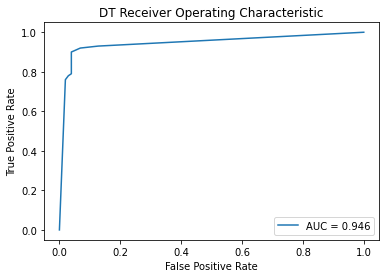

In [214]:
from sklearn.metrics import roc_curve, roc_auc_score

DT1 = DT.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, DT1)
fpr1, tpr1, threshold = roc_curve(y_test, DT1)
plt.title('DT Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('DT ROC AUC %.3f' % roc_auc)
plt.savefig('DT ROC_curve.jpg')
plt.show()

# Ext val

In [272]:
DT_predict_ext = DT.predict(x_ext)
print('Accuracy_score=',(accuracy_score(y_ext, DT_predict_ext)))
print((confusion_matrix(y_ext, DT_predict_ext)))

Accuracy_score= 0.505
[[83 17]
 [82 18]]


In [273]:
print(classification_report(y_ext, DT_predict_ext))
pd.crosstab(y_ext, DT_predict_ext)

              precision    recall  f1-score   support

           0       0.50      0.83      0.63       100
           1       0.51      0.18      0.27       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.45       200
weighted avg       0.51      0.51      0.45       200



col_0,0,1
Target,,
0,83,17
1,82,18


# NB

In [230]:
NB = GaussianNB(priors= None, var_smoothing= 0) 
NB.fit(x_train, y_train)

GaussianNB(var_smoothing=0)

In [21]:
NB_pred = NB.predict(x_test)
print('Accuracy_score=',(accuracy_score(y_test, NB_pred)))
print((confusion_matrix(y_test, NB_pred)))
print(classification_report(y_test, NB_pred))
pd.crosstab(y_test, NB_pred)

Accuracy_score= 0.9257425742574258
[[97  5]
 [10 90]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       102
           1       0.95      0.90      0.92       100

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



col_0,0,1
Target,,
0,97,5
1,10,90


In [227]:
from sklearn.model_selection import cross_val_score,KFold

NB = GaussianNB(priors= None, var_smoothing= 0) 
kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(NB,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95031056 0.9689441  0.9378882  0.94409938 0.95625   ]
Average Cross Validation score :0.951498447204969


In [228]:
from sklearn.model_selection import cross_val_score,KFold

NB = GaussianNB(priors= None, var_smoothing= 0) 
kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(NB,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.95061728 0.96296296 0.97530864 0.96296296 0.9875     0.9
 0.9875     0.9375     0.95       0.9625    ]
Average Cross Validation score :0.9576851851851853


NB ROC AUC 0.957


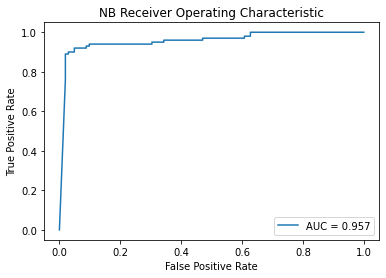

In [231]:
from sklearn.metrics import roc_curve, roc_auc_score

NB1 = NB.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, NB1)
fpr1, tpr1, threshold = roc_curve(y_test, NB1)
plt.title('NB Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('NB ROC AUC %.3f' % roc_auc)
plt.savefig('NB ROC_curve.jpg')
plt.show()

# Ext val

In [269]:
NB_pred_ext = NB.predict(x_ext)
print('Accuracy_score=',(accuracy_score(y_ext, NB_pred_ext)))
print((confusion_matrix(y_ext, NB_pred_ext)))
print(classification_report(y_ext, NB_pred_ext))
pd.crosstab(y_ext, NB_pred_ext)

Accuracy_score= 0.88
[[86 14]
 [10 90]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       100
           1       0.87      0.90      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



col_0,0,1
Target,,
0,86,14
1,10,90


# SVM

In [223]:
SV = svm.SVC(C= 0.9, degree= 82, random_state= 151, gamma= 'scale', kernel= 'rbf', max_iter= -1, verbose= 27, 
             probability= 0, shrinking= 0, break_ties = False, decision_function_shape= 'ovr')
SV.fit(x_train, y_train)

[LibSVM]

SVC(C=0.9, degree=82, probability=0, random_state=151, shrinking=0, verbose=27)

In [23]:
svm = SV.predict(x_test)

In [24]:
print("Accuracy:",accuracy_score(y_test, svm))

Accuracy: 0.806930693069307


In [25]:
print(classification_report(y_test, svm))
pd.crosstab(y_test, svm)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       102
           1       0.83      0.77      0.80       100

    accuracy                           0.81       202
   macro avg       0.81      0.81      0.81       202
weighted avg       0.81      0.81      0.81       202



col_0,0,1
Target,,
0,86,16
1,23,77


In [221]:
from sklearn.model_selection import cross_val_score,KFold

SV = svm.SVC(C= 0.9, degree= 82, random_state= 151, gamma= 'scale', kernel= 'rbf', max_iter= -1, verbose= 27, 
             probability= 0, shrinking= 0, break_ties = False, decision_function_shape= 'ovr')
kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(SV,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Cross Validation Scores are [0.85093168 0.86335404 0.88198758 0.80745342 0.8625    ]
Average Cross Validation score :0.853245341614907


In [222]:
from sklearn.model_selection import cross_val_score,KFold

SV = svm.SVC(C= 0.9, degree= 82, random_state= 151, gamma= 'scale', kernel= 'rbf', max_iter= -1, verbose= 27, 
             probability= 0, shrinking= 0, break_ties = False, decision_function_shape= 'ovr')
kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(SV,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Cross Validation Scores are [0.79012346 0.91358025 0.81481481 0.91358025 0.9        0.85
 0.85       0.8125     0.85       0.875     ]
Average Cross Validation score :0.8569598765432099


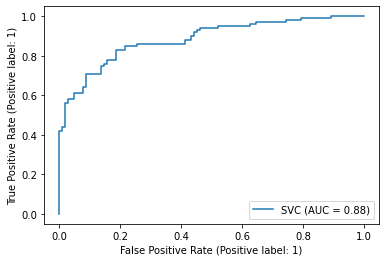

In [224]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(SV, x_test, y_test)
plt.savefig('SVC ROC_curve.jpg')
plt.plot(color= 'black')
plt.show()

# External val

In [267]:
svm_ext = SV.predict(x_ext)

In [268]:
print("Accuracy:",accuracy_score(y_ext, svm_ext ))
print(classification_report(y_ext, svm_ext ))
pd.crosstab(y_ext, svm_ext )

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       100
           1       0.82      0.84      0.83       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



col_0,0,1
Target,,
0,82,18
1,16,84


# ANN

In [172]:
NN = MLPClassifier(hidden_layer_sizes= 45, max_iter= 175, activation= 'relu', solver= 'adam', alpha= 0.0, 
                   learning_rate= 'constant', random_state= 156, learning_rate_init= 0.001, verbose= False)

In [260]:
NN = MLPClassifier(hidden_layer_sizes= 405, max_iter=67,
                   validation_fraction= 0.7, 
                   activation= 'relu', solver='adam', alpha= 0.0,
                   learning_rate= 'constant', random_state= 339,
                   learning_rate_init= 0.01,
                   verbose= True)

In [261]:
NN.fit(x_train, y_train)

Iteration 1, loss = 12.12066627
Iteration 2, loss = 15.46203388
Iteration 3, loss = 7.30906087
Iteration 4, loss = 2.81382683
Iteration 5, loss = 4.00789083
Iteration 6, loss = 2.13452260
Iteration 7, loss = 2.34182025
Iteration 8, loss = 1.20613671
Iteration 9, loss = 1.12407389
Iteration 10, loss = 0.58196677
Iteration 11, loss = 0.60472423
Iteration 12, loss = 0.36750005
Iteration 13, loss = 0.30305153
Iteration 14, loss = 0.23696187
Iteration 15, loss = 0.19151474
Iteration 16, loss = 0.17504265
Iteration 17, loss = 0.25596702
Iteration 18, loss = 0.16753521
Iteration 19, loss = 0.15619471
Iteration 20, loss = 0.16777473
Iteration 21, loss = 0.21577646
Iteration 22, loss = 0.13621188
Iteration 23, loss = 0.13479180
Iteration 24, loss = 0.13091879
Iteration 25, loss = 0.10403058
Iteration 26, loss = 0.14307834
Iteration 27, loss = 0.22240656
Iteration 28, loss = 0.12496518
Iteration 29, loss = 0.15415457
Iteration 30, loss = 0.29872370
Iteration 31, loss = 0.14629571
Iteration 32, l

MLPClassifier(alpha=0.0, hidden_layer_sizes=405, learning_rate_init=0.01,
              max_iter=67, random_state=339, validation_fraction=0.7,
              verbose=True)

In [253]:
from sklearn.metrics import accuracy_score
ANN = NN.predict(x_test)
print(accuracy_score(y_test, ANN))
pd.crosstab(y_test, ANN)

0.9752475247524752


col_0,0,1
Target,,
0,101,1
1,4,96


In [254]:
print(classification_report(y_test, ANN))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       102
           1       0.99      0.96      0.97       100

    accuracy                           0.98       202
   macro avg       0.98      0.98      0.98       202
weighted avg       0.98      0.98      0.98       202



# K fold

In [257]:
from sklearn.model_selection import cross_val_score,KFold

NN = MLPClassifier(hidden_layer_sizes= 405, max_iter=67,
                   validation_fraction= 0.7, 
                   activation= 'relu', solver='adam', alpha= 0.0,
                   learning_rate= 'constant', random_state= 339,
                   learning_rate_init= 0.01,
                   verbose= True)

kf=KFold(n_splits=5, random_state=42,shuffle=True)
score=cross_val_score(NN,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Iteration 1, loss = 15.93627121
Iteration 2, loss = 8.27466720
Iteration 3, loss = 5.47525585
Iteration 4, loss = 2.61049404
Iteration 5, loss = 3.58302089
Iteration 6, loss = 1.87791532
Iteration 7, loss = 2.02111436
Iteration 8, loss = 1.17218678
Iteration 9, loss = 1.37891815
Iteration 10, loss = 0.64685529
Iteration 11, loss = 0.68122104
Iteration 12, loss = 0.35351973
Iteration 13, loss = 0.34172816
Iteration 14, loss = 0.29041180
Iteration 15, loss = 0.22487571
Iteration 16, loss = 0.19830025
Iteration 17, loss = 0.17552936
Iteration 18, loss = 0.15914932
Iteration 19, loss = 0.14348894
Iteration 20, loss = 0.14599919
Iteration 21, loss = 0.13992873
Iteration 22, loss = 0.15727053
Iteration 23, loss = 0.11042785
Iteration 24, loss = 0.13700890
Iteration 25, loss = 0.13105402
Iteration 26, loss = 0.10579155
Iteration 27, loss = 0.08790754
Iteration 28, loss = 0.09665144
Iteration 29, loss = 0.08162323
Iteration 30, loss = 0.07264876
Iteration 31, loss = 0.06653518
Iteration 32, lo

Iteration 20, loss = 0.11302546
Iteration 21, loss = 0.10726702
Iteration 22, loss = 0.09448038
Iteration 23, loss = 0.09052308
Iteration 24, loss = 0.07469611
Iteration 25, loss = 0.07150297
Iteration 26, loss = 0.08106755
Iteration 27, loss = 0.05815234
Iteration 28, loss = 0.05875901
Iteration 29, loss = 0.05654108
Iteration 30, loss = 0.05509245
Iteration 31, loss = 0.04982751
Iteration 32, loss = 0.05085579
Iteration 33, loss = 0.04627102
Iteration 34, loss = 0.04234962
Iteration 35, loss = 0.04173249
Iteration 36, loss = 0.03995709
Iteration 37, loss = 0.03887206
Iteration 38, loss = 0.04035603
Iteration 39, loss = 0.03726667
Iteration 40, loss = 0.04132147
Iteration 41, loss = 0.11103577
Iteration 42, loss = 0.07225415
Iteration 43, loss = 0.05180805
Iteration 44, loss = 0.03538693
Iteration 45, loss = 0.04308409
Iteration 46, loss = 0.03674766
Iteration 47, loss = 0.04064082
Iteration 48, loss = 0.04144344
Iteration 49, loss = 0.03097745
Iteration 50, loss = 0.02938603
Iteratio

In [258]:
from sklearn.model_selection import cross_val_score,KFold

NN = MLPClassifier(hidden_layer_sizes= 405, max_iter=67,
                   validation_fraction= 0.7, 
                   activation= 'relu', solver='adam', alpha= 0.0,
                   learning_rate= 'constant', random_state= 339,
                   learning_rate_init= 0.01,
                   verbose= True)

kf=KFold(n_splits=10, random_state=42,shuffle=True)
score=cross_val_score(NN,x_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Iteration 1, loss = 13.87010995
Iteration 2, loss = 11.51506833
Iteration 3, loss = 4.34824455
Iteration 4, loss = 3.61487635
Iteration 5, loss = 2.68746310
Iteration 6, loss = 1.73610885
Iteration 7, loss = 1.62397747
Iteration 8, loss = 0.99535191
Iteration 9, loss = 0.88194756
Iteration 10, loss = 0.58637429
Iteration 11, loss = 0.49625153
Iteration 12, loss = 0.33162978
Iteration 13, loss = 0.27962384
Iteration 14, loss = 0.19775824
Iteration 15, loss = 0.20469903
Iteration 16, loss = 0.16131271
Iteration 17, loss = 0.15004221
Iteration 18, loss = 0.14228541
Iteration 19, loss = 0.12802153
Iteration 20, loss = 0.12200679
Iteration 21, loss = 0.11060352
Iteration 22, loss = 0.10321714
Iteration 23, loss = 0.09888528
Iteration 24, loss = 0.09307361
Iteration 25, loss = 0.08295005
Iteration 26, loss = 0.07737802
Iteration 27, loss = 0.07786795
Iteration 28, loss = 0.06837911
Iteration 29, loss = 0.06542060
Iteration 30, loss = 0.06236561
Iteration 31, loss = 0.05951466
Iteration 32, l

Iteration 1, loss = 14.79076541
Iteration 2, loss = 11.44027572
Iteration 3, loss = 4.49997564
Iteration 4, loss = 3.87708560
Iteration 5, loss = 3.02922347
Iteration 6, loss = 1.93277327
Iteration 7, loss = 1.77322455
Iteration 8, loss = 1.05316816
Iteration 9, loss = 0.96400948
Iteration 10, loss = 0.58687840
Iteration 11, loss = 0.53079957
Iteration 12, loss = 0.31449215
Iteration 13, loss = 0.34033676
Iteration 14, loss = 0.21598068
Iteration 15, loss = 0.22690786
Iteration 16, loss = 0.17649808
Iteration 17, loss = 0.16732866
Iteration 18, loss = 0.16038345
Iteration 19, loss = 0.13987154
Iteration 20, loss = 0.13347676
Iteration 21, loss = 0.12427045
Iteration 22, loss = 0.12495185
Iteration 23, loss = 0.11343985
Iteration 24, loss = 0.11542869
Iteration 25, loss = 0.09356341
Iteration 26, loss = 0.09413933
Iteration 27, loss = 0.08534292
Iteration 28, loss = 0.08098913
Iteration 29, loss = 0.07829498
Iteration 30, loss = 0.06832821
Iteration 31, loss = 0.07314874
Iteration 32, l

Iteration 1, loss = 13.38170715
Iteration 2, loss = 7.36033014
Iteration 3, loss = 4.50091763
Iteration 4, loss = 2.19783209
Iteration 5, loss = 2.07633249
Iteration 6, loss = 1.69180718
Iteration 7, loss = 1.21584529
Iteration 8, loss = 0.81779327
Iteration 9, loss = 0.51152060
Iteration 10, loss = 0.44074628
Iteration 11, loss = 0.32588717
Iteration 12, loss = 0.22501716
Iteration 13, loss = 0.22175720
Iteration 14, loss = 0.21451856
Iteration 15, loss = 0.18179976
Iteration 16, loss = 0.16241195
Iteration 17, loss = 0.16251805
Iteration 18, loss = 0.12730901
Iteration 19, loss = 0.12314567
Iteration 20, loss = 0.10943775
Iteration 21, loss = 0.10125532
Iteration 22, loss = 0.09544876
Iteration 23, loss = 0.09169682
Iteration 24, loss = 0.08567707
Iteration 25, loss = 0.07555778
Iteration 26, loss = 0.07271991
Iteration 27, loss = 0.06906434
Iteration 28, loss = 0.06690952
Iteration 29, loss = 0.06396752
Iteration 30, loss = 0.05782018
Iteration 31, loss = 0.05710677
Iteration 32, lo

ANN ROC AUC 0.997


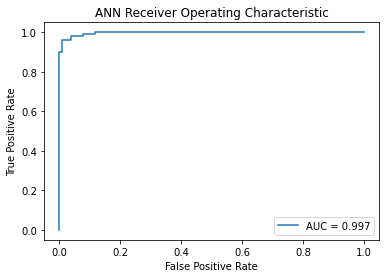

In [262]:
from sklearn.metrics import roc_curve, roc_auc_score

NN1 = NN.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, NN1)
fpr1, tpr1, threshold = roc_curve(y_test, NN1)
plt.title('ANN Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('ANN ROC AUC %.3f' % roc_auc)
plt.savefig('ANN ROC_curve.jpg')
plt.show()

# Ext_val

In [264]:
from sklearn.metrics import accuracy_score
ANN_ext = NN.predict(x_ext)
print(accuracy_score(y_ext, ANN_ext))
print(classification_report(y_ext, ANN_ext))
pd.crosstab(y_ext, ANN_ext)

0.935
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       100
           1       0.96      0.91      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



col_0,0,1
Target,,
0,96,4
1,9,91


# External database screening using XGB

In [ ]:
df2 = pd.read_excel('Seaweed.xlsx')
df2.head()

In [ ]:
df2 = df2.set_index(['Name','ID', ], inplace= True)

In [ ]:
x = df2.loc[:,['nAcid','ALogP','ALogp2','AMR','naAromAtom','nAtom','nHeavyAtom','nH','nC','nN',
                   'nO','nF','nCl','nX','nBondsD','C1SP2','C1SP3','C3SP3','fragC','nHBDon','nHBDon_Lipinski','nTRing',
                   'RotBtFrac','MW','AMW','FP7','FP17','FP18',
              'FP122','FP131','FP189','FP190','FP250','FP277','FP305','FP310','FP326','FP344','FP345','FP450','FP462','FP486',
              'FP513','FP521','FP579','FP661','FP663','FP683','FP701','FP718','FP757','FP774','FP775','FP787','FP797','FP807',
              'FP823','FP928','FP939','FP963','ExtFP94','ExtFP115','ExtFP178','ExtFP236','ExtFP266','ExtFP269','ExtFP290',
              'ExtFP353','ExtFP381','ExtFP424','ExtFP426','ExtFP517','ExtFP533','ExtFP554','ExtFP564','ExtFP599','ExtFP627',
              'ExtFP726','ExtFP763','ExtFP785','ExtFP812','ExtFP864','ExtFP872','ExtFP949','ExtFP955','ExtFP960','ExtFP990',
              'EStateFP28','EStateFP34','MACCSFP16','MACCSFP32','MACCSFP39','MACCSFP49','MACCSFP102','MACCSFP110','MACCSFP112',
              'MACCSFP123','MACCSFP125','MACCSFP126','MACCSFP130','MACCSFP138','MACCSFP151','PubchemFP145','PubchemFP148',
              'PubchemFP336','PubchemFP356','PubchemFP357','PubchemFP378','PubchemFP379','PubchemFP532','PubchemFP548',
              'PubchemFP569','PubchemFP605','PubchemFP617','PubchemFP643','PubchemFP650','PubchemFP686','PubchemFP737',
              'SubFP19','SubFP28','SubFP84','SubFP297']]

In [ ]:
x

In [ ]:
xgb_sw = xg.predict(x)

In [ ]:
xgb_sw

In [ ]:
# Convert the predictions to a DataFrame - Method 1
df3 = pd.DataFrame(xgb_sw)
df3.to_excel('output.xlsx', index= True)

In [ ]:
# Convert the predictions to a DataFrame - Method 2
predictions_df = pd.DataFrame(xgb_sw, index=x.index, columns=['Prediction'])

In [ ]:
# Combine the predictions with the original index
result_df = pd.concat([x, predictions_df], axis=1)

In [ ]:
# Export the results to an Excel file
result_df.to_excel('SW_predictions_output.xlsx')